In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def initial_conditions(nx, x):
    rho = np.ones(nx)  # Плотность
    u = np.zeros(nx)   # Скорость
    p = np.ones(nx)    # Давление
    # Установка начальных условий (например, ударная волна)
    index = [i for i in range(nx) if x[i]>0.0]

    rho[index] = 0.125
    p[index] = 0.1
    
    q = np.zeros((3,nx))
    q[0] = rho
    q[1] = rho*u
    q[2] = p/(gamma-1)+0.5*rho*np.power(u,2)
    
    return q


In [3]:

# Функция для вычисления flux
#np.seterr(all='warn')
def calc_flux(rho, u, p):
    F1 = rho*u
    F2 = rho*np.power(u,2) + p
    F3 = (rho*np.power(u,2)/2 + gamma*p/(gamma - 1))*u
    return F1, F2, F3

def calc_flux2(q):
    rho = q[0]
    u = q[1]/q[0]
    p = (gamma-1)*(q[2]-0.5*q[0]*u**2)
    return np.array([q[1],q[1]*u+p,u*(q[2]+p)])

# Функция для метода Годунова
def godunov_method(dx, dt, q):
    q_half = np.zeros((3,nx))
    
    # Вычисление flux на границах ячеек
    #F1, F2, F3 = calc_flux(rho, u, p)

    for i in range(1, nx):
        f_left = calc_flux2(q[:, i-1])
        f_right = calc_flux2(q[:, i])
        q_half[:,i] = 0.5*(q[:,i] + q[:,i-1] - dt/dx*(f_right-f_left))
        
    return q_half



 0.05


C:\Users\izavo\AppData\Local\Temp\ipykernel_8016\1467657326.py:11: RuntimeWarning: invalid value encountered in double_scalars
  u = q[1]/q[0]
C:\Users\izavo\AppData\Local\Temp\ipykernel_8016\1614881955.py:23: RuntimeWarning: invalid value encountered in divide
  plt.plot(x, q[1]/q[0], label='Velocity')
C:\Users\izavo\AppData\Local\Temp\ipykernel_8016\1614881955.py:24: RuntimeWarning: invalid value encountered in divide
  plt.plot(x, (gamma-1)*(q[2] - 0.5*q[1]**2/q[0]), label='Pressure')


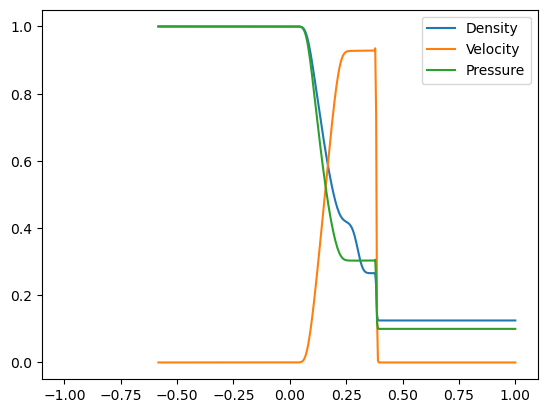

C:\Users\izavo\AppData\Local\Temp\ipykernel_8016\1614881955.py:33: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,  q[1]/q[0], label='Скорость')
C:\Users\izavo\AppData\Local\Temp\ipykernel_8016\1614881955.py:37: RuntimeWarning: invalid value encountered in divide
  plt.plot(x, (gamma-1)*(q[2] - 0.5*q[1]**2/q[0]), label='Давление')
C:\Users\izavo\AppData\Local\Temp\ipykernel_8016\1614881955.py:41: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,  q[2]/q[0], label='Энергия')


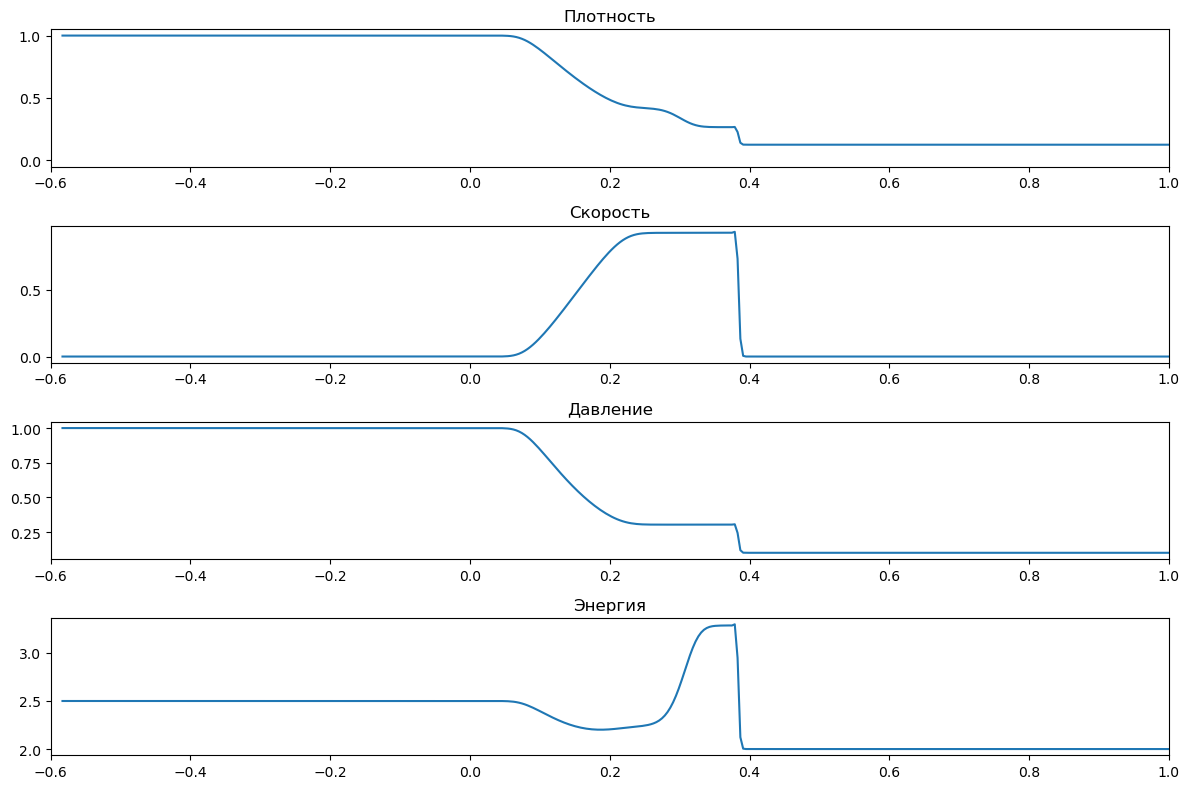

In [4]:
# Основной цикл
# Параметры
gamma = 1.4  # Коэффициент адиабаты
nx = 500  # Количество ячеек
dx = 1.0 / nx  # Шаг по пространству
x = np.linspace(-1, 1.0, nx)
#dt = 0.001  # Шаг по времени
T = float(input())
q = np.zeros((3,nx))
q = initial_conditions(nx,x)
dt = 0.9 * dx / np.max(np.abs(q[1]/q[0])+np.sqrt(gamma*q[2]/q[0]))
t = 0.0

while t < T:
    q_half = godunov_method(dx, dt, q)
    q = godunov_method(dx, dt, q_half)
    t += dt
    
# Визуализация результатов

plt.figure()
plt.plot(x, q[0], label='Density')
plt.plot(x, q[1]/q[0], label='Velocity')
plt.plot(x, (gamma-1)*(q[2] - 0.5*q[1]**2/q[0]), label='Pressure')
plt.legend()
plt.show()
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(x,  q[0], label='Плотность')
plt.xlim([-0.6,1])
plt.title('Плотность')
plt.subplot(4, 1, 2)
plt.plot(x,  q[1]/q[0], label='Скорость')
plt.xlim([-0.6,1])
plt.title('Скорость')
plt.subplot(4, 1, 3)
plt.plot(x, (gamma-1)*(q[2] - 0.5*q[1]**2/q[0]), label='Давление')
plt.xlim([-0.6,1])
plt.title('Давление')
plt.subplot(4, 1, 4)
plt.plot(x,  q[2]/q[0], label='Энергия')
plt.xlim([-0.6,1])
plt.title('Энергия')

plt.tight_layout()
plt.show()